## Spotify Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
    screen, and acts as the figure GUI manager.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The explicit (object-oriented) API is recommended for complex plots, though
    pyplot is still usually used to create the figure and often the axes in the
    figure. See `.pyplot.figure`, `.pyplot.subplots`, and
    `.pyplot.subplot_mosaic` to create figures, and
    :doc:`Axes API <../axes_api>` for the plotting methods on an axes::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.

In [4]:
df = pd.read_csv('kaggle/data.csv')

In [5]:
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [10]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [11]:
df.isna()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2014,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [15]:
topartist = df.groupby("artist").count().sort_values(by="song_title", ascending=False)["song_title"][:10]

In [16]:
topartist

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
FIDLAR              9
Crystal Castles     9
*NSYNC              8
Fall Out Boy        8
Michael Jackson     8
Name: song_title, dtype: int64

<AxesSubplot:xlabel='artist'>

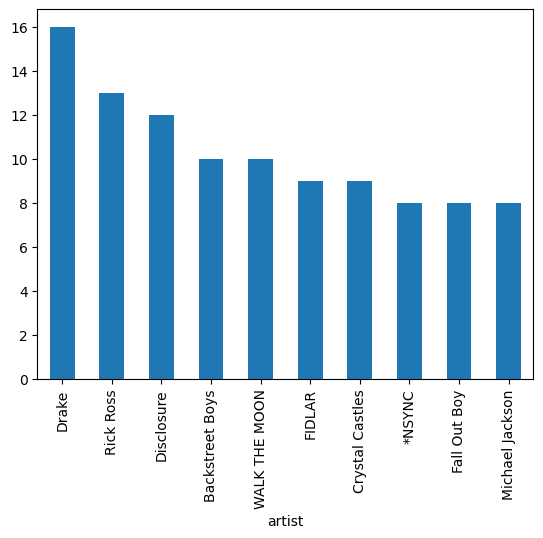

In [17]:
topartist.plot.bar()

In [18]:
dance = df[["danceability", "song_title", "artist"]].sort_values(by="danceability", ascending=False)[:5]

In [19]:
dance

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


In [24]:
import os
import spotipy
import json
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [25]:
sns.set()

In [26]:
cid='client app id'
secret='app screte code'
redirect_uri='http://localhost:5000/callback'
username='your user name'

In [27]:
# Authorization flow
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [28]:
# getting 50 songs and writing them in a json file
if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_top_tracks(limit=50,offset=0,time_range='medium_term')
    for song in range(50):
        list = []
        list.append(results)
        with open('top50_data.json', 'w', encoding='utf-8') as f:
            json.dump(list, f, ensure_ascii=False, indent=4)
else:
    print("Can't get token for", username)

In [29]:
with open('top50_data.json') as f:
    data = json.load(f)

len(data[0]['items'])

50

In [30]:
list_of_results = data[0]["items"]
list_of_artist_names = []
list_of_artist_uri = []
list_of_song_names = []
list_of_song_uri = []
list_of_durations_ms = []
list_of_explicit = []
list_of_albums = []
list_of_popularity = []

for result in list_of_results:
    result["album"]
    this_artists_name = result["artists"][0]["name"]
    list_of_artist_names.append(this_artists_name)
    this_artists_uri = result["artists"][0]["uri"]
    list_of_artist_uri.append(this_artists_uri)
    list_of_songs = result["name"]
    list_of_song_names.append(list_of_songs)
    song_uri = result["uri"]
    list_of_song_uri.append(song_uri)
    list_of_duration = result["duration_ms"]
    list_of_durations_ms.append(list_of_duration)
    song_explicit = result["explicit"]
    list_of_explicit.append(song_explicit)
    this_album = result["album"]["name"]
    list_of_albums.append(this_album)
    song_popularity = result["popularity"]
    list_of_popularity.append(song_popularity)

In [31]:
all_songs = pd.DataFrame(
    {'artist': list_of_artist_names,
     'artist_uri': list_of_artist_uri,
     'song': list_of_song_names,
     'song_uri': list_of_song_uri,
     'duration_ms': list_of_durations_ms,
     'explicit': list_of_explicit,
     'album': list_of_albums,
     'popularity': list_of_popularity
     
    })

In [32]:
all_songs.sort_values('popularity')

,artist,artist_uri,song,song_uri,duration_ms,explicit,album,popularity
9,Country Vocals,spotify:artist:1hRL36E0wdcEjJXpLd0pVX,Land of the crane,spotify:track:1wNWsu5EEspe602AOTctHD,220774,False,Land of the crane,0
33,ALLAN TONIKS,spotify:artist:5uLEt18awSsO8Ne5gkxM9s,Tukyeekole,spotify:track:2vlidlqu6zShW6Wgf2TJTP,244871,False,G.O.D,18
1,Elisha Toto,spotify:artist:6PJTZgbBmGTfuLX6G4gPbh,PAROGA JASUBA (CORONA SONG) HERA RINGO E REMO,spotify:track:7qeTi6sClLsN8LmN6RcndK,557998,False,PAROGA JASUBA (CORONA SONG) HERA RINGO E REMO,22
15,Carol Nantongo,spotify:artist:2xO06FDsmU4hoQAxS9jfyW,Oliwa,spotify:track:5mSVLT1XQhcgGW1ANq1Nj8,195056,False,Oliwa,22
43,Winnie Nwagi,spotify:artist:6D2BPqCTzdBn26ficmaciD,Fire Dancer,spotify:track:3G5kGcVao6k0SZyE5x4DIY,227755,False,Fire Dancer,24
2,Iyanii,spotify:artist:3gLHw3c6qPeJFMmgyZYfmr,Pombe,spotify:track:0iX7rlh6FwfgVx98qmMfet,153202,False,Pombe,30
13,KALLITECHNIS,spotify:artist:6i3sYlO1zUHf5IWHpXt4Sl,SOFT LIFE,spotify:track:4fp0ypnQqHSKndK2ACcN8T,205233,False,SOFT LIFE,30
18,Eliott,spotify:artist:2oYcBXVaDoRJZiIwydeDzB,Home,spotify:track:2HSJ1E5UnTeiDcJzYsSpYr,217426,False,Home,31
16,Azawi,spotify:artist:0ZhMKJPaUXzfU0FgAzIOgR,Craving You Heavy,spotify:track:6gfdkLXXBzNUkCsf31PVYm,201926,False,AFRICAN MUSIC,32
30,Spice Diana,spotify:artist:0l4viSdndwVHufMRZposyM,Siri Regular,spotify:track:6sLc1SFNZPY0nl2loqS9X4,217959,False,Star Gal,35


In [33]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlists = sp.user_playlists(username)
for playlist in playlists['items']:
    print('Name: {}, Playlist ID: {}, No Tracks: {}'.
          format(playlist['name'], playlist['id'], playlist['tracks']['total']))

Name: JB Recommends #01, Playlist ID: 5uNHz5FcvCaIiUC5hF92Cl, No Tracks: 30
Name: Wassim, Playlist ID: 3EvLYYjoyo4xar7u9qo1K0, No Tracks: 0
Name: Hot Country, Playlist ID: 37i9dQZF1DX1lVhptIYRda, No Tracks: 50
Name: JB's Country, Playlist ID: 7C84XsnhjQlY6QHrGxswZI, No Tracks: 2
Name: JB Shazs, Playlist ID: 1lHodRZmd7o7YHqCcaC08z, No Tracks: 3
Name: JB Uganda #1, Playlist ID: 3TJ0JPze18u6PSGLVtPiwE, No Tracks: 1
Name: JB’s Friendship , Playlist ID: 1oLfZbz5Gtd3MyvocASkTf, No Tracks: 1
Name: JB’s Motivational , Playlist ID: 2hELi7RkVIm7re2VmIgLdI, No Tracks: 3
Name: JB Oldies #1, Playlist ID: 2uBDFJkuEgI32uiw91HkTs, No Tracks: 0
Name: Country Mix, Playlist ID: 37i9dQZF1EQmPV0vrce2QZ, No Tracks: 50
Name: JB Christian #1, Playlist ID: 0uZtg3ci1EgFGy5q0fDhgV, No Tracks: 18
Name: JB Mood #1, Playlist ID: 4ua71Ofyc6Ow86iVfy83Jz, No Tracks: 8
Name: JB Dance #1, Playlist ID: 54e3VS7z0VeRYDEuhrwOSH, No Tracks: 0


In [34]:
def fetch_playlists(sp, username):
    """
    Returns the user's playlists.
    """
        
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [35]:
fetch_playlists(sp, username)

,id,name,#tracks
0,5uNHz5FcvCaIiUC5hF92Cl,JB Recommends #01,30
1,3EvLYYjoyo4xar7u9qo1K0,Wassim,0
2,37i9dQZF1DX1lVhptIYRda,Hot Country,50
3,7C84XsnhjQlY6QHrGxswZI,JB's Country,2
4,1lHodRZmd7o7YHqCcaC08z,JB Shazs,3
5,3TJ0JPze18u6PSGLVtPiwE,JB Uganda #1,1
6,1oLfZbz5Gtd3MyvocASkTf,JB’s Friendship,1
7,2hELi7RkVIm7re2VmIgLdI,JB’s Motivational,3
8,2uBDFJkuEgI32uiw91HkTs,JB Oldies #1,0
9,37i9dQZF1EQmPV0vrce2QZ,Country Mix,50


In [36]:
def fetch_playlist_tracks(sp, username, playlist_id):
    """
    Returns the tracks for the given playlist.
    """
        
    offset = 0
    tracks = []
    
    # Make the API request
    while True:
        content = sp.user_playlist_tracks(username, playlist_id, fields=None, limit=100, offset=offset, market=None)
        tracks += content['items']
        
        if content['next'] is not None:
            offset += 100
        else:
            break
    
    track_id = []
    track_name = []
    
    for track in tracks:
        track_id.append(track['track']['id'])
        track_name.append(track['track']['name'])
    
    # Create the final df
    df_playlists_tracks = pd.DataFrame({"track_id":track_id, "track_name": track_name})
    return df_playlists_tracks

In [38]:
fetch_playlist_tracks(sp, username, '37i9dQZF1EQmPV0vrce2QZ')

,track_id,track_name
0,2UikqkwBv7aIvlixeVXHWt,You Should Probably Leave
1,4dtIxANFBU6CfhI9c2hf2g,Coal
2,72kGuWpRiuA149Bn5lDkIO,We Ride
3,1ipcb9qXpSHWhSUvdxJhsx,"Forever and Ever, Amen"
4,4TJUS843fKiqqIzycM74Oy,Should've Been A Cowboy
5,5Pgwi0iizu96RHxJ4xL3SH,Strawberry Wine
6,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves)
7,2uX5f3x2cObov0iDAPln4o,Song of the South
8,6iy4PoAuZBMvtrlDX4VxC7,Check Yes Or No
9,7G6l2FtQyRhQgYgut2I6i8,As Good As I Once Was


In [39]:
def fetch_audio_features(sp, username, playlist_id):
    playlist = fetch_playlist_tracks(sp, username, playlist_id)
    index = 0
    audio_features = []
    
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    features_list = []
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['energy'], features['tempo'],
                              features['loudness'], features['valence'],
                              features['speechiness'], features['instrumentalness'],
                              features['liveness'], features['acousticness']])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'energy',
                                                             'tempo', 'loudness', 'valence',
                                                             'speechiness', 'instrumentalness',
                                                             'liveness', 'acousticness'])
    
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_id', inplace=True, drop=True)
        
    return df_playlist_audio_features

In [40]:
df = fetch_audio_features(sp, username, '37i9dQZF1EQmPV0vrce2QZ')

In [41]:
df.head()

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
2UikqkwBv7aIvlixeVXHWt,You Should Probably Leave,0.602,0.477,183.890,-8.425,0.552,0.0320,0.000031,0.173,0.2680
4dtIxANFBU6CfhI9c2hf2g,Coal,0.522,0.223,97.045,-9.561,0.439,0.0345,0.000000,0.165,0.7530
72kGuWpRiuA149Bn5lDkIO,We Ride,0.620,0.706,81.989,-4.176,0.591,0.0251,0.000008,0.185,0.0755
1ipcb9qXpSHWhSUvdxJhsx,"Forever and Ever, Amen",0.677,0.724,90.392,-8.992,0.697,0.0245,0.000101,0.158,0.1430
4TJUS843fKiqqIzycM74Oy,Should've Been A Cowboy,0.618,0.672,133.439,-7.920,0.705,0.0353,0.000001,0.214,0.4410


In [43]:
df_dinner = fetch_audio_features(sp, username, '5uNHz5FcvCaIiUC5hF92Cl')
df_party = fetch_audio_features(sp, username, '37i9dQZF1DX1lVhptIYRda')
df_lounge = fetch_audio_features(sp, username, '37i9dQZF1EQmPV0vrce2QZ')
df_pop = fetch_audio_features(sp, username, '0uZtg3ci1EgFGy5q0fDhgV')

In [45]:
import warnings
warnings.filterwarnings('ignore')

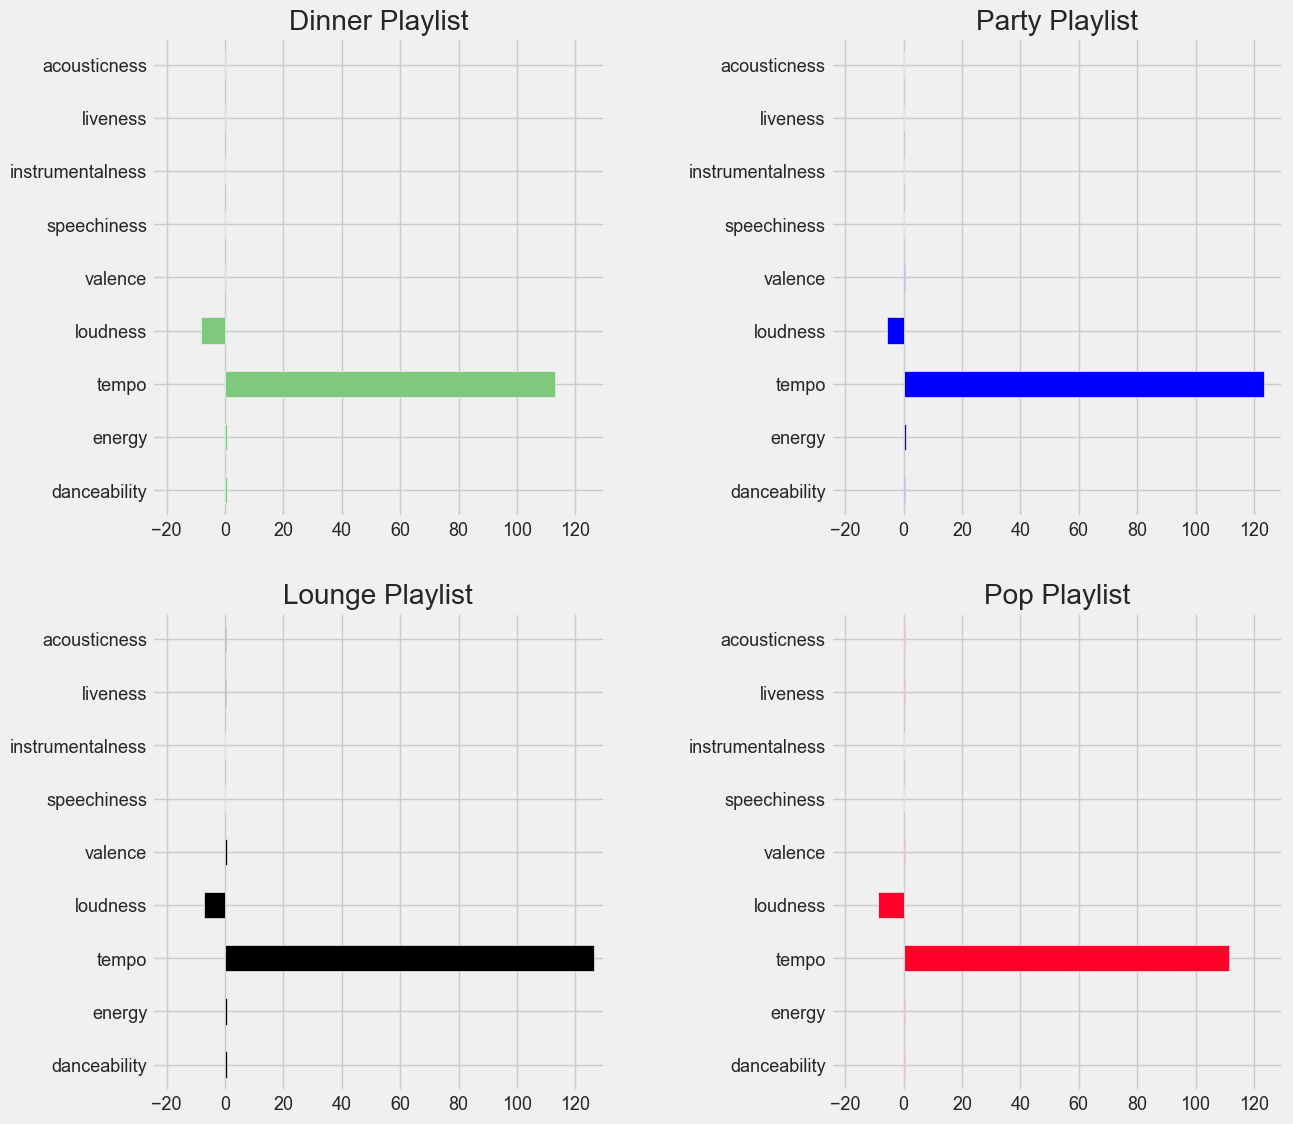

In [46]:
# Create a figure
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 13))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.subplots_adjust(hspace=.2, wspace=.5)

# top left
df_dinner.mean().plot.barh(ax=ax1, colormap=plt.cm.Accent, fontsize=13)
ax1.set_xlim(-25,130)

# top right
df_party.mean().plot.barh(ax=ax2, colormap='winter', fontsize=13)
ax2.set_xlim(-25,130)

# bottom left
df_lounge.mean().plot.barh(ax=ax3, colormap='cubehelix', fontsize=13)
ax3.set_xlim(-25,130)

# bottom right
df_pop.mean().plot.barh(ax=ax4, colormap='gist_rainbow', fontsize=13)
ax4.set_xlim(-25,130)

# Create axis titles
ax1.set_title('Dinner Playlist')
ax2.set_title('Party Playlist')
ax3.set_title('Lounge Playlist')
ax4.set_title('Pop Playlist')

plt.show()